# Bande interdite, bande de valance et bande de conduction
**La bande interdite**  d'un matériau, ou gap, est l'intervalle, situé entre la bande de valence et la bande de conduction, dans lequel la densité d'états électroniques est nulle, de sorte qu'on n'y trouve par de niveau d'énergie électronique. **La largeur de bande interdite**, ou band gap en anglais, est une caractéristique fondamentale des matériaux semiconducteurs ; souvent notée Eg, elle est généralement exprimée en électronvolts (eV).

**La largeur de bande interdite** correspond à l'énergie qu'un électron doit acquérir pour passer de la bande de valence, où il reste localisé autour d'un noyau atomique, à la bande de conduction, où il devient libre de circuler dans le cristal pour devenir un porteur de charge assurant la conductivité électrique

In [73]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.electronic_structure import plotter

In [74]:
with MPRester ("dSIkoJuHEqTpcGXu8") as m:
    
    #Informations par rapport aux bandes
    bands = m.get_bandstructure_by_material_id("mp-961660")

## 1) Détermination de la bande interdite


In [75]:
#récupération des infos de la bande interdite
band_gap = bands.get_band_gap()
print("Bande directe ? : ", band_gap['direct'])
print("Energie : ", band_gap['energy'], 'eV')
print("Transition : ", band_gap['transition'])

print('\n\n Numéros des bandes pour la VBM (valence band maximum) : ',bands.get_vbm()['band_index'])
print('Numéros de la bande pour la CBM (conduction band minimum) : ',bands.get_cbm()['band_index'])

Bande directe ? :  False
Energie :  0.8605999999999998 eV
Transition :  L-\Gamma


 Numéros des bandes pour la VBM (valence band maximum) :  defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14]})
Numéros de la bande pour la CBM (conduction band minimum) :  defaultdict(<class 'list'>, {<Spin.up: 1>: [15]})


[(0.0, 0.8605999999999998), (3.2584981522828587, 0.8605999999999998), (3.2584981522828587, 0.8605999999999998)]
[(4.226835618862918, 0.0), (4.226835618862918, 0.0), (6.097519953928935, 0.0), (6.097519953928935, 0.0)]


Text(0.5, 1.0, 'Structure de bandes électroniques')

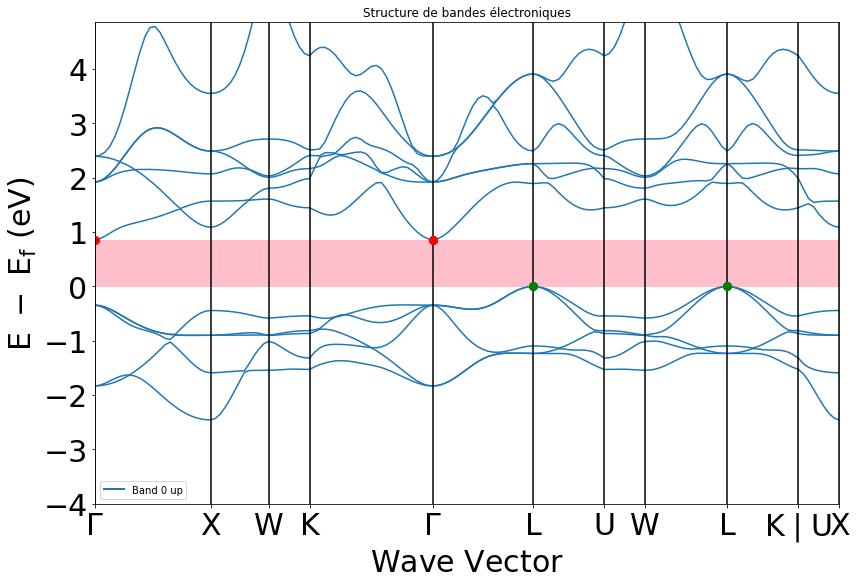

In [76]:
#Données importantes pour la suite
graphe = plotter.BSPlotter(bands)
bs_plot_data = graphe.bs_plot_data()
distance = bs_plot_data.get('ticks').get('distance')
distances = bs_plot_data.get('distances') #récupération des directions que peuvent prendre k
energy = bs_plot_data.get('energy') #energie associée aux différentes directions
band_gap = bands.get_band_gap()

# On récupère le plot
graphe.get_plot()
    
# On marque la CBM sur le graphe
cbm_coord = bs_plot_data.get('cbm')
print(cbm_coord) # Coordonnées des minima de la bande de conduction
for i in range(len(cbm_coord)):
    (x,y) = cbm_coord[i]
    plt.plot(x, y, 'or', markersize = 8)

# On marque les VBM sur le graphe  
vbm_coord = bs_plot_data.get('vbm')
print(vbm_coord) # Coordonnées des maxima de la bande de valence
for i in range(len(vbm_coord)):
    (x,y) = vbm_coord[i]
    plt.plot(x, y, 'og', markersize = 8)

# On met en évidence la bande interdite
plt.fill_between(np.linspace(distance[0], distance[-1], 500), 0, band_gap.get('energy'), color = "pink")

# Pour le titre 
plt.title('Structure de bandes électroniques')


## 2) Directions de dispersions

Pour évaluer la dispersion, on cherche l'énergie du minimum de la bande de conduction et du maximum de la bande de valence. Une fois cela fait, il faut comparer les différentes pentes. Si la pente est maximale, la dispersion l'est aussi, si elle est minimale, il en est de même pour la dispersion.

In [77]:
#calcul pente 
def pente(a,b):
    pente = abs(b[-1]-b[0])/(a[-1]-a[0])
    return np.array([pente,a[0],b[0],a[-1]-a[0],b[-1]-b[0]])

**Calcul pour la dernière bande de valence**

In [78]:
pentes_valence = np.zeros((len(distances), 5))

indice_max_val = 0
indice_min_val = 0

pente_min_val = 0
pente_max_val = 0

for i in range(len(distances)) : 
    pentes_valence[i] = pente(distances[i],energy["1"][i][14]) #14 est le numéro de la dernière bande de valence
    if i == 0: 
        pente_min_val = pente(distances[i],energy["1"][i][14])[0] 
        pente_max_val = pente(distances[i],energy["1"][i][14])[0] 
    else :
        if (pente_min_val > pentes_valence[i][0]) :
            pente_min_val = pentes_valence[i][0] 
            indice_min_val = i
        if pente_max_val < pentes_valence[i][0]  :
            pente_max_val = pentes_valence[i][0] 
            indice_max_val = i
            
pentes_valence = pentes_valence.T

**Calcul pour la première bande de conduction**

In [79]:
pentes_conduction = np.zeros((len(distances), 5))

indice_max_cond = 0
indice_min_cond = 0

pente_min_cond = 0
pente_max_cond = 0
for i in range(len(distances)) : 
    pentes_conduction[i] = pente(distances[i],energy["1"][i][15]) #15 est le numéro de la première bande de conduction 
    if i == 0: 
        pente_min_cond = pente(distances[i],energy["1"][i][15])[0] 
        pente_max_cond = pente(distances[i],energy["1"][i][15])[0] 
    else :
        if (pente_min_cond > pentes_conduction[i][0]) :
            pente_min_cond = pentes_conduction[i][0] 
            indice_min_cond= i
        if pente_max_cond < pentes_conduction[i][0]  :
            pente_max_cond = pentes_conduction[i][0] 
            indice_max_cond = i
pentes_conduction = pentes_conduction.T

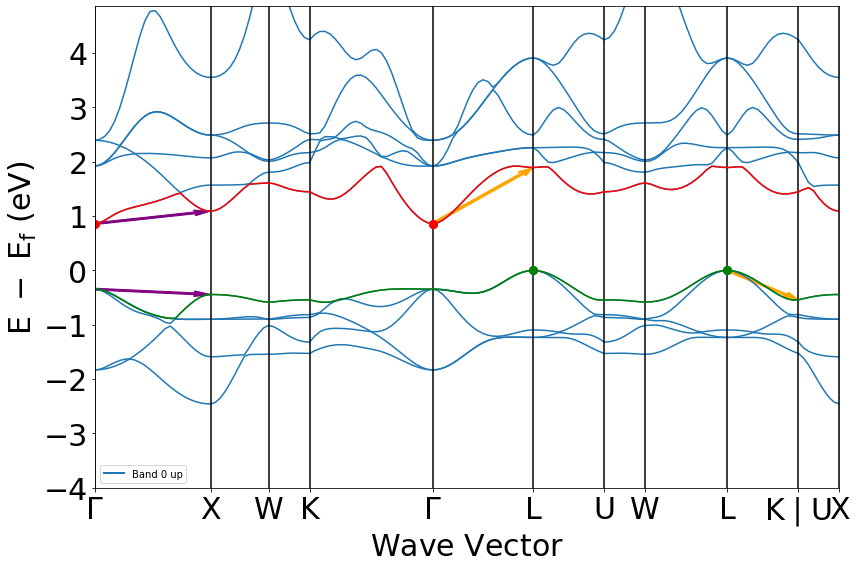

In [80]:
graphe.get_plot()

#On récupère le valence band maximum et le conduction band minimum
Vbm = bs_plot_data.get("vbm")
Cbm = bs_plot_data.get("cbm")

#On trace la première bande de conduction et la dernière bande de valence
for i in range(len(distances)):
    plt.plot(distances[i],energy['1'][i][14],'green')
    plt.plot(distances[i],energy['1'][i][15],'red')

# On trace en rouge les points VBM et en vert les points CBM  
for i in range(len(Vbm)):
    x, y= Vbm[i]
    plt.plot(x, y, 'og', markersize=8)
for i in range(len(Cbm)):
    x, y = Cbm[i]
    plt.plot(x ,y ,'or',markersize=8)
    
plt.arrow(pentes_conduction[1][indice_max_cond], pentes_conduction[2][indice_max_cond], pentes_conduction[3][indice_max_cond], pentes_conduction[4][indice_max_cond], color='orange', width=0.035, length_includes_head=True)
plt.arrow(pentes_conduction[1][indice_min_cond], pentes_conduction[2][indice_min_cond], pentes_conduction[3][indice_min_cond], pentes_conduction[4][indice_min_cond], color='purple', width=0.035, length_includes_head=True)

plt.arrow(pentes_valence[1][indice_max_val], pentes_valence[2][indice_max_val], pentes_valence[3][indice_max_val], pentes_valence[4][indice_max_val], color='orange', width=0.035, length_includes_head=True)
plt.arrow(pentes_valence[1][indice_min_val], pentes_valence[2][indice_min_val], pentes_valence[3][indice_min_val], pentes_valence[4][indice_min_val], color='purple', width=0.035, length_includes_head=True)

On peut remarquer en trait continu rouge la première bande de conduction et trait continu vert la dernière bande de valence. Les points verts représentent les points auxquels l'énergie maximale des bandes de valence est atteinte. Les points rouges représentent les points auxquels l'énergie minimale des bandes de conduction est atteinte.Les flèches représentent respectivement les directions pour lesquelles il y a le plus (en orange) et le moins (en mauve) de dispersion pour la dernière bande de valence et première bande de conduciton.

## 3) Calcul de la masse effective en supposant dispersion parabolique
Pour le calcul de la masse effective, nous allons partir de la formule $m_{eff} = \hbar^2(\frac{\partial^2 E}{\partial k^2})^{-1}$ et considérer que la structure de la bande de valence peut être approximée par un polynôme du second ordre au alentours des positions d'intérêts (voir énoncé). Après réarrangement, nous obtenons l'expression $E = \frac{\hbar^2 k^2}{2m_{eff}} + A k + B$. Ensuite, il suffira de prendre le premier coefficient de l'interpolation et isoler $m_{eff}$.

In [81]:
#interpolation pour dernière bande de valence
vbms = bs_plot_data.get('vbm')

k_val = np.zeros(3)
k_val[0] = distances[4][-3]
k_val[1] = vbms[0][0]
k_val[2] = distances[5][2]

E_val = np.zeros(3)
E_val[0] = energy.get('1')[-1][14][-1]
E_val[1] = vbms[0][1]
E_val[2] = energy.get('1')[-1][15][1]

#interpolation pour première bande de conduction
cbms = bs_plot_data.get('cbm')

k_cond = np.zeros(3)
k_cond[0] = distances[3][-3]
k_cond[1] = cbms[1][0]
k_cond[2] = distances[4][2]

E_cond = np.zeros(3)
E_cond[0] = energy.get('1')[1][14][0]
E_cond[1] = vbms[1][1]
E_cond[2] = energy.get('1')[1][15][0]

In [82]:
#On crée la focntion d'interpolation de degré deux pour la dernière bande de valence et on la trace
fct_vbm = np.polyfit(k_val, E_val, 2) 
pts_val = np.linspace(distances[4][0],distances[5][-1],1000)

#On crée la focntion d'interpolation de degré deux pour la première bbande de conduction et on la trace
fct_cbm = np.polyfit(k_cond, E_cond, 2)
pts_cbm = np.linspace(distances[3][0],distances[4][-1],1000)

**Calculs des masse effectives**

In [83]:
#Calcul de la constane de Planck
h = (6.62607*10**(-34))/(2*np.pi*1.6021766*10**(-19)) #[eV]

#Calcul pour la dernière bande de valence 
m_eff_val = h**2/(2*fct_vbm[0])

#Calcul pour la première bande de conduction 
m_eff_cond = h**2/(2*fct_cbm[0])

print("Masse effective pour la bande de valence = "+str(m_eff_val)+" kg.")
print("Masse effective pour la bande de valence = "+str(m_eff_cond)+" kg.")

Masse effective pour la bande de valence = 3.9582414384009536e-33 kg.
Masse effective pour la bande de valence = 6.249416289173948e-33 kg.
